In [142]:
# !pip install gensim
# !pip install nltk

In [143]:
import numpy as np
import pandas as pd
import os

import pickle
from sklearn.linear_model import LogisticRegression
import sklearn.pipeline
from cross_validation import train_models_and_calc_scores_for_n_fold_cv
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [144]:
# data_dir='./data_reviews'

# # read in training data
# x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
# y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

# # create a list of all reviews
# x_text_list = x_train_df.values[:,1]
# x_text_list = x_text_list.tolist()

# tokens = [word_tokenize(review.lower()) for review in x_text_list]

# word_2_vec = Word2Vec(tokens, vector_size=100, window=5, min_count=1, workers=4)
# print(x_text_list)

In [145]:
# # takes average of vector for all words in a sentence
# def average_word_vectors(words, model, vocabulary, num_features):
#     feature_vector = np.zeros((num_features,), dtype="float64")
#     nwords = 0.
    
#     for word in words:
#         if word in vocabulary: 
#             nwords = nwords + 1.
#             feature_vector = np.add(feature_vector, model.wv[word])
    
#     if nwords:
#         feature_vector = np.divide(feature_vector, nwords)
        
#     return feature_vector

# # list of vectors
# feature_vectors = [average_word_vectors(review, word_2_vec, word_2_vec.wv.key_to_index, 100) for review in x_text_list]
# x_train_matrix = np.stack(feature_vectors)

In [146]:
data_dir='./data_reviews'

# read in training data
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

# create a list of all reviews
x_text_list = x_train_df.values[:,1]
x_text_list = x_text_list.tolist()

vectorizer = TfidfVectorizer(stop_words="english")

# fit_transform will make its own vocabular from the text
x = vectorizer.fit_transform(x_text_list)  
x_train_matrix = x.toarray()

# export vocabulary
vocabulary = vectorizer.vocabulary_
with open('vocab2.pkl','wb') as f:
    pickle.dump(vocabulary,f)

In [147]:
# # export vocabulary
# with open('word2vec_model.pkl','wb') as f:
#     pickle.dump(word_2_vec,f)

In [148]:

clf = RandomForestClassifier()

# C is hyperparam for regularization
param_grid = {"n_estimators": [32,64,128,256,512,1024],
              "criterion": ['gini','entropy','log_loss'],
              "max_features": ['sqrt','log2',None],
              'max_depth': [10,20,30,40,50,60,70,80,90,100,None],
              'min_samples_leaf': [1,2,4,8,16],
              'min_samples_split': [2,5,10]}

# by default,um folds is 5
search = HalvingGridSearchCV(clf, param_grid,cv=5, random_state=0).fit(x_train_matrix, y_train_df)

c:\Users\Will's Computer\.conda\envs\cs135_env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Will's Computer\.conda\envs\cs135_env\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Will's Computer\.conda\envs\cs135_env\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Will's Computer\.conda\envs\cs135_env\lib\site-packages\sklearn\model_selection

In [ ]:
print(search.best_params_)
# print(search.cv_results_['split0_test_score'])
print(search.cv_results_['params'])

# print(len(search.cv_results_['mean_test_score']))
# print(indices)
# for idx in indices:
#     print(search.cv_results_['params'][idx])

indices = range(len(search.cv_results_['mean_test_score']) - 2)
test_scores = []
train_scores = []
test_split0, train_split0, test_split1, train_split1, test_split2, train_split2, test_split3, train_split3, test_split4, train_split4 = ([] for i in range(10))
for idx in indices:
    test_scores.append(search.cv_results_['mean_test_score'][idx])
    train_scores.append(search.cv_results_['mean_train_score'][idx])
    test_split0.append(search.cv_results_['split0_test_score'][idx])
    train_split0.append(search.cv_results_['split0_train_score'][idx])
    test_split1.append(search.cv_results_['split1_test_score'][idx])
    train_split1.append(search.cv_results_['split1_train_score'][idx])
    test_split2.append(search.cv_results_['split2_test_score'][idx])
    train_split2.append(search.cv_results_['split2_train_score'][idx])
    test_split3.append(search.cv_results_['split3_test_score'][idx])
    train_split3.append(search.cv_results_['split3_train_score'][idx])
    test_split4.append(search.cv_results_['split4_test_score'][idx])
    train_split4.append(search.cv_results_['split4_train_score'][idx])

print(test_scores)
print(train_scores)

{'criterion': 'log_loss', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 128}
[{'criterion': 'log_loss', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 128}, {'criterion': 'log_loss', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 128}, {'criterion': 'log_loss', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 128}, {'criterion': 'log_loss', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 128}, {'criterion': 'log_loss', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 10, 'n_estimators': 128}, {'criterion': 'log_loss', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 128}, {'criterion': 'log_loss', 'max_depth': 5

In [ ]:
model = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'], criterion=search.best_params_['criterion'], max_features=search.best_params_['max_features'], max_depth=search.best_params_['max_depth'], min_samples_leaf=search.best_params_['min_samples_leaf'], min_samples_split=search.best_params_['min_samples_split'])
y_train_labels = y_train_df
model.fit(x_train_matrix, y_train_labels.values.ravel())

# save classifiers to pkl files
with open('prob2model.pkl','wb') as f:
    pickle.dump(model,f)

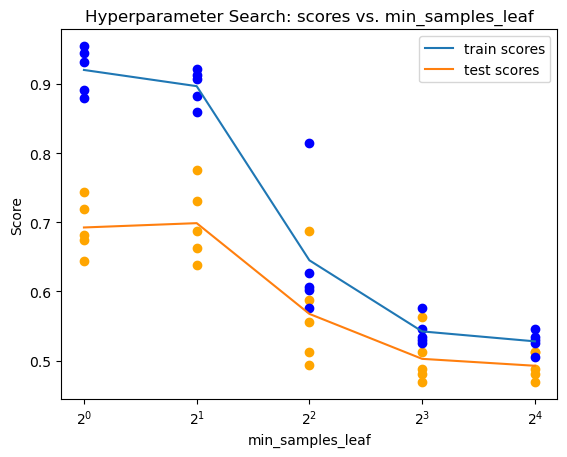

In [ ]:
x =  [1,2,4,8,16]
plt.plot(x, train_scores, label="train scores")
plt.plot(x, test_scores, label="test scores")
plt.scatter(x, test_split0, color="orange")
plt.scatter(x, test_split1, color="orange")
plt.scatter(x, test_split2, color="orange")
plt.scatter(x, test_split3, color="orange")
plt.scatter(x, test_split4, color="orange")
plt.scatter(x, train_split0, color="blue")
plt.scatter(x, train_split1, color="blue")
plt.scatter(x, train_split2, color="blue")
plt.scatter(x, train_split3, color="blue")
plt.scatter(x, train_split4, color="blue")
plt.legend()
plt.title("Hyperparameter Search: scores vs. min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")
plt.xscale('log', base=2)
plt.show()

In [ ]:

y_train_df = np.array(y_train_df)
y_train_df.shape
y_train_df = y_train_df.reshape((2400,))
print(y_train_df.shape)

(2400,)


In [ ]:
print(x_train_df.to_numpy().shape)
print(x_train_matrix.shape)

(2400, 2)
(2400, 4255)


In [ ]:
K = 5
        
cv_train_err_list = []
cv_valid_err_list = []
# pipeline = sklearn.pipeline.Pipeline(
#     steps = [('Log regr', LogisticRegression(C= 1e-10, penalty='l1', tol=1e-7))])

#y_train_df = np.array(y_train_df)
length = 2400
split = 0.8
split_spot = 1920
rand_indicies = np.random.permutation(length)
x_train_array = x_train_df.to_numpy()
x_train_text = x_train_array[rand_indicies]
x_train_NV = x_train_matrix[rand_indicies]
y_train_df = y_train_df[rand_indicies]

x_train_split = x_train_NV[0:split_spot]
y_train_split = y_train_df[0:split_spot]
x_test_split = x_train_NV[split_spot:2400]
y_test_split = y_train_df[split_spot:2400]

pipeline = RandomForestClassifier(n_estimators=128, criterion='log_loss', max_features='sqrt', max_depth=50, min_samples_leaf=2, min_samples_split=10)

pipeline.fit(x_train_split, y_train_split)

preds = pipeline.predict(x_test_split)
y_proba_preds = pipeline.predict_proba(x_test_split)

In [ ]:
false_positives = np.intersect1d(np.where(preds == 1)[0], np.where(y_test_split == 0)[0]) + 1920
false_negatives = np.intersect1d(np.where(preds == 0)[0], np.where(y_test_split == 1)[0]) + 1920
print(false_negatives)
# print(len(false_positives))
# print(x_train_df.shape)
# for idx in false_negatives:
#     print(x_train_df[idx])
for idx in false_negatives:
    print(x_train_text[idx])
    print(y_train_df[idx])
    print(preds[idx - 1920])

[1927 1933 1934 1944 1945 1947 1951 1954 1956 1966 1971 1998 2000 2006
 2007 2014 2023 2028 2029 2054 2060 2061 2079 2089 2097 2101 2106 2109
 2127 2142 2144 2147 2149 2158 2175 2192 2197 2205 2209 2213 2218 2225
 2228 2244 2254 2256 2260 2261 2262 2274 2280 2281 2283 2295 2302 2305
 2319 2320 2327 2330 2334 2335 2340 2363 2367 2376 2394]
['yelp' 'Cute, quaint, simple, honest.']
1
0
['imdb'
 ') What makes this story different are the terrific production values - faultless photography, composition and editing - the terrific casting - the underappreciated Brian Keith playing a bully Teddy - and vivid history.  ']
1
0
['amazon'
 "My phone doesn't slide around my car now and the grip prevents my phone from slipping out of my hand."]
1
0
['imdb'
 'Totally different, with loads of understatement and black comedy, this is a film few get to see, but those who do will remember it.  ']
1
0
['imdb' "Funny, clever, hip - just like Pray's previous film, Hype!  "]
1
0
['imdb'
 'Damian is so talented

In [ ]:
# print(len(false_positives))
# print(x_train_df.shape)
# for idx in false_negatives:
#     print(x_train_df[idx])
for idx in false_positives:
    print(x_train_text[idx])

['imdb'
 "It's a shame to see nice actors like Thomerson and James make a living in a mess like this.  "]
['amazon'
 'Looks nice in the picture, but this case was a huge disappointment!!']
['imdb'
 "The puppets look really cheesy , not in a nice way like in the Puppet Master 80's flicks.  "]
['imdb' 'My rating: just 3 out of 10.  ']
['amazon'
 'I really wanted the Plantronics 510 to be the right one, but it has too many issues for me.The nice']
['yelp' "REAL sushi lovers, let's be honest - Yama is not that nice."]
['yelp'
 'By this time our side of the restaurant was almost empty so there was no excuse.']
['yelp'
 "We aren't ones to make a scene at restaurants but I just don't get it...definitely lost the love after this one!"]
['yelp'
 'We had so much to say about the place before we walked in that he expected it to be amazing, but was quickly disappointed.']
['amazon'
 'The design is very odd, as the ear "clip" is not very comfortable at all.']
['imdb' 'In fact, this stinker smells l

In [ ]:
# compute AUROC score
auroc_score = roc_auc_score( y_test_split, y_proba_preds[:,1]) 
print(auroc_score)

0.8829913043478261


In [ ]:
print(cv_train_err_list)
print(cv_valid_err_list)
# for C= 1e-10, penalty='l2', tol=1e-7
#   train_err = 0.43073043
#   valid_err = 0.52891713
# for C= 1e6, penalty='l2', tol=1e-7
#   train_err = 0.07053015
#   valid_err = 0.48599428
# for C= 1, penalty='l2', tol=1e-3
#   train_err = 0.19003116
#   valid_err = 0.44722232
# for C= 10-5, penalty='l2', tol=1e-1
#   train_err = 0.12028722
#   valid_err = 0.4509112

[]
[]
